To disable all warnings:

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Maximum Flow Problem

In this tutorial we will solve maximum flow problem using the Python library "NetworkX". 

First, let's start by importing the libraries.

In [2]:
import numpy as np
import networkx as nx

# Problem 01

A cargo company operates its own logistics network with limited delivery capacity due to fixed installations. As a result of a disaster in the country, relief materials in city A must be regularly delivered to city D where the disaster occurred. Given the daily capacities of the logistics lines, find the maximum steady flow of materials per day through this logistics network. 

| City | City | Total line capacity per day |
| :--: | :--: | :-------------------: |
| A | B | 40 |
| A | C | 160 |
| B | C | 60 |
| D | A | 50 |
| D | B | 120 |
| D | C | 30 |

The Python library "NetworkX" supports directed graphs with self loops through the class DiGraph.

In [3]:
G1 = nx.DiGraph()
G1.add_nodes_from([
    ("A", {"color": "black"}),
    ("B", {"color": "black"}),
    ("C", {"color": "black"}),
    ("D", {"color": "black"}),
])

Now, we can define the positions(as the coordinates "x,y" on a 2D plane) of the nodes(vertices).

In [4]:
nodepos = {
    "A":np.array([0.0,0.0]),
    "B":np.array([0.5,1.0]),
    "C":np.array([1.5,-1.0]),
    "D":np.array([2.5,2.0])
}

{('A', 'B'): Text(0.25, 0.5, '20'),
 ('A', 'C'): Text(0.75, -0.5, '80'),
 ('A', 'D'): Text(1.25, 1.0, '25'),
 ('B', 'A'): Text(0.25, 0.5, '20'),
 ('B', 'C'): Text(1.0, 0.0, '30'),
 ('B', 'D'): Text(1.5, 1.5, '60'),
 ('C', 'A'): Text(0.75, -0.5, '80'),
 ('C', 'B'): Text(1.0, 0.0, '30'),
 ('C', 'D'): Text(2.0, 0.5, '15'),
 ('D', 'A'): Text(1.25, 1.0, '25'),
 ('D', 'B'): Text(1.5, 1.5, '60'),
 ('D', 'C'): Text(2.0, 0.5, '15')}

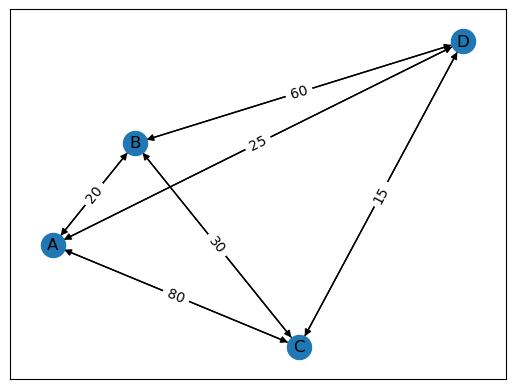

In [5]:
elist = [("A", "B"),
         ("B", "A"),
         ("A", "C"),
         ("C", "A"),
         ("B", "C"),
         ("C", "B"),
         ("D", "A"),
         ("A", "D"),
         ("D", "B"),
         ("B", "D"),
         ("D", "C"),
         ("C", "D")]
G1.add_edges_from(elist)
eattrs = {("A", "B"): {"capacity": 20}, 
          ("B", "A"): {"capacity": 20}, 
          ("A", "C"): {"capacity": 80}, 
          ("C", "A"): {"capacity": 80},
          ("B", "C"): {"capacity": 30}, 
          ("C", "B"): {"capacity": 30}, 
          ("D", "A"): {"capacity": 25}, 
          ("A", "D"): {"capacity": 25},
          ("D", "B"): {"capacity": 60}, 
          ("B", "D"): {"capacity": 60}, 
          ("D", "C"): {"capacity": 15}, 
          ("C", "D"): {"capacity": 15}}
nx.set_edge_attributes(G1, eattrs)
nx.draw_networkx_nodes(G1, pos = nodepos)
nx.draw_networkx_labels(G1, pos = nodepos)
nx.draw_networkx_edges(G1, pos = nodepos, edgelist=elist, arrows=True, connectionstyle='arc3, rad = 0')
nx.draw_networkx_edge_labels(G1, pos = nodepos, edge_labels = nx.get_edge_attributes(G1,'capacity'), label_pos = 0.5)

To get information on the graph "G1":

In [6]:
print(G1)

DiGraph with 4 nodes and 12 edges


To get the sparse adjacency matrix (in compressed sparse row format) of the graph "G1":

In [7]:
G1Adj = nx.adjacency_matrix(G1)
print(G1Adj)

  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (1, 0)	1
  (1, 2)	1
  (1, 3)	1
  (2, 0)	1
  (2, 1)	1
  (2, 3)	1
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1


To have the adjacency matrix of the graph "G1" in dense form:

In [8]:
G1_dense = np.array(G1Adj.todense())
print(G1_dense)

[[0 1 1 1]
 [1 0 1 1]
 [1 1 0 1]
 [1 1 1 0]]


In [9]:
maxflow_value, flows = nx.maximum_flow(G1, "A", "D")
print(flows)

{'A': {'B': 20, 'C': 45, 'D': 25}, 'B': {'A': 0, 'C': 0, 'D': 50}, 'C': {'A': 0, 'B': 30, 'D': 15}, 'D': {'A': 0, 'B': 0, 'C': 0}}


In [10]:
print(maxflow_value)

90


The emergency situation has changed in city D. Now, it is needed to know whether it is possible to send supplies to D consisting of 40 units per day from A and 40 units per day from C.

In [11]:
G2 = nx.DiGraph()
G2.add_nodes_from([
    ("A", {"color": "black"}),
    ("B", {"color": "black"}),
    ("C", {"color": "black"}),
    ("D", {"color": "black"}),
    ("S", {"color": "black"}),
])

In [12]:
nodepos = {
    "A":np.array([0.0,0.0]),
    "B":np.array([0.5,1.0]),
    "C":np.array([1.5,-1.0]),
    "D":np.array([2.5,2.0]),
    "S":np.array([-1.0,-1.0])
}

{('A', 'B'): Text(0.25, 0.5, '20'),
 ('A', 'C'): Text(0.75, -0.5, '80'),
 ('A', 'D'): Text(1.25, 1.0, '25'),
 ('B', 'A'): Text(0.25, 0.5, '20'),
 ('B', 'C'): Text(1.0, 0.0, '30'),
 ('B', 'D'): Text(1.5, 1.5, '60'),
 ('C', 'A'): Text(0.75, -0.5, '80'),
 ('C', 'B'): Text(1.0, 0.0, '30'),
 ('C', 'D'): Text(2.0, 0.5, '15'),
 ('D', 'A'): Text(1.25, 1.0, '25'),
 ('D', 'B'): Text(1.5, 1.5, '60'),
 ('D', 'C'): Text(2.0, 0.5, '15'),
 ('S', 'A'): Text(-0.5, -0.5, '40'),
 ('S', 'C'): Text(0.25, -1.0, '40')}

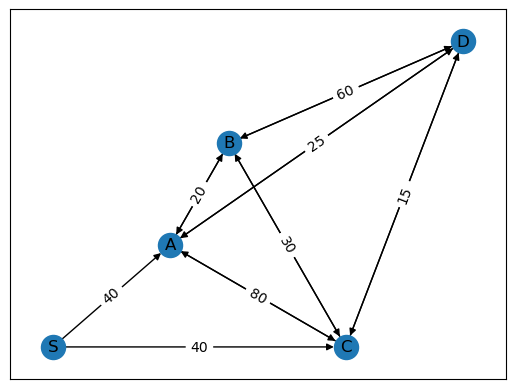

In [13]:
elist = [("A", "B"),
         ("B", "A"),
         ("A", "C"),
         ("C", "A"),
         ("B", "C"),
         ("C", "B"),
         ("D", "A"),
         ("A", "D"),
         ("D", "B"),
         ("B", "D"),
         ("D", "C"),
         ("C", "D"),
         ("S", "A"),
         ("S", "C")]
G2.add_edges_from(elist)
eattrs = {("A", "B"): {"capacity": 20}, 
          ("B", "A"): {"capacity": 20}, 
          ("A", "C"): {"capacity": 80}, 
          ("C", "A"): {"capacity": 80},
          ("B", "C"): {"capacity": 30}, 
          ("C", "B"): {"capacity": 30}, 
          ("D", "A"): {"capacity": 25}, 
          ("A", "D"): {"capacity": 25},
          ("D", "B"): {"capacity": 60}, 
          ("B", "D"): {"capacity": 60}, 
          ("D", "C"): {"capacity": 15}, 
          ("C", "D"): {"capacity": 15},
          ("S", "A"): {"capacity": 40},
          ("S", "C"): {"capacity": 40}}
nx.set_edge_attributes(G2, eattrs)
nx.draw_networkx_nodes(G2, pos = nodepos)
nx.draw_networkx_labels(G2, pos = nodepos)
nx.draw_networkx_edges(G2, pos = nodepos, edgelist=elist, arrows=True, connectionstyle='arc3, rad = 0')
nx.draw_networkx_edge_labels(G2, pos = nodepos, edge_labels = nx.get_edge_attributes(G2,'capacity'), label_pos = 0.5)

In [14]:
maxflow_value, flows = nx.maximum_flow(G2, "S", "D")
print(flows)

{'A': {'B': 15, 'C': 0, 'D': 25}, 'B': {'A': 0, 'C': 0, 'D': 40}, 'C': {'A': 0, 'B': 25, 'D': 15}, 'D': {'A': 0, 'B': 0, 'C': 0}, 'S': {'A': 40, 'C': 40}}


In [15]:
print(maxflow_value)

80
